In [1]:
import pandas as pd

import stone

import cv2

import imutils
from imutils import face_utils

import dlib

import numpy as np
from numpy import mean

import webcolors

from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.image as mpimg
import seaborn as sn

from hair_color_detector import HairColorDetector

# Getting skin color

#### taken from "pip install skin-tone-classifier"

In [5]:
# getting skin color
#run time 50 seconds
#used list then made a df at the end because adding row by row doesnt work because it just replaces it 
data = []
season = ["Autumn","Spring","Summer","Winter"]

    
for seas in season:
    for num in range(1, 100+1):
    
        data_add = []
        img_no = seas + " (" + str(num) + ").png"
        
        result = stone.process(img_no, "color", return_report_image=True) # this makes stone analyze the photo

        #gets part of the result we want through slicing
        dom_skin = result["faces"][0]['dominant_colors'][0]['color'] # getting the dominant skin color 
        skin_tone = result["faces"][0]['skin_tone'] # getting the average skin tone
    
        #adding to list
        data_add.append(img_no)
        data_add.append(dom_skin)
        data_add.append(skin_tone)
        data.append(data_add)

df_skin = pd.DataFrame(data,columns = ['season_no','dominant_skin','skin_tone'])
df_skin

,season_no,dominant_skin,skin_tone
0,Autumn (1).png,#C79473,#9D7A54
1,Autumn (2).png,#D5996C,#9D7A54
2,Autumn (3).png,#D6A282,#BEA07E
3,Autumn (4).png,#E6B49B,#E7C1B8
4,Autumn (5).png,#C18B6A,#9D7A54
...,...,...,...
395,Winter (96).png,#DD9781,#9D7A54
396,Winter (97).png,#B97F60,#81654F
397,Winter (98).png,#754E41,#81654F
398,Winter (99).png,#DAB39D,#BEA07E


# Getting Eye color

#### taken from "https://stackoverflow.com/questions/45513886/opencv-how-can-i-get-the-eye-color"

In [44]:
# Getting Eye color
# run time 500+ seconds


data = []
season = ["Autumn","Spring","Summer","Winter"]

for seas in season:
    for num in range(1, 100+1):
            
        data_add = []
        img_no = seas + " (" + str(num) + ").png"
        flag=0
        detector = dlib.get_frontal_face_detector() # finds face
        predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") # represents the eyes as numbers
        
        img= cv2.imread(img_no)
        img_rgb= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)   #convert to RGB
        
        
        
        (left_Start, left_End) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]            
        #points for left eye and right eye
        (right_Start, right_End) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]
        
        
        gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        
        # detect dlib face rectangles in the grayscale frame
        dlib_faces = detector(gray, 0)
        
        
        for face in dlib_faces:
            eyes = []                          # store 2 eyes
        
            # convert dlib rect to a bounding box
            (x,y,w,h) = face_utils.rect_to_bb(face)
            cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(255,0,0),1)       #draws blue box over face 
         
            
            
            shape = predictor(gray, face)
            shape = face_utils.shape_to_np(shape)
            
            leftEye = shape[left_Start:left_End]               
            # indexes for left eye key points
        
            rightEye = shape[right_Start:right_End]
            
            eyes.append(leftEye)  # wrap in a list
            eyes.append(rightEye)

            # gets position of eye to get color
            for index, eye in enumerate(eyes):
                flag+=1
                left_side_eye = eye[0]  # left edge of eye
                right_side_eye = eye[3]  # right edge of eye
                top_side_eye = eye[1]  # top side of eye
                bottom_side_eye = eye[4]  # bottom side of eye
        
                # calculate height and width of dlib eye keypoints
                eye_width = right_side_eye[0] - left_side_eye[0]
                eye_height = bottom_side_eye[1] - top_side_eye[1]
        
                # create bounding box with buffer around keypoints
                eye_x1 = int(left_side_eye[0] - 0 * eye_width)  
                eye_x2 = int(right_side_eye[0] + 0 * eye_width)  
        
                eye_y1 = int(top_side_eye[1] - 1 * eye_height)
                eye_y2 = int(bottom_side_eye[1] + 0.75 * eye_height)
        
                # draw bounding box around eye roi
                
                #cv2.rectangle(img_rgb,(eye_x1, eye_y1), (eye_x2, eye_y2),(0,255,0),2) 
                
                
                roi_eye = img_rgb[eye_y1:eye_y2 ,eye_x1:eye_x2]     #  desired EYE Region(RGB)
                if flag==1:
                    break
                
        x=roi_eye.shape                                                        
        row=x[0] 
        col=x[1]
        # this is the main part,                             
        # where you pick RGB values from the area just below pupil
        array1=roi_eye[row//2:(row//2)+1,int((col//3)+3):int((col//3))+6]
        array1=array1[0][2]
        array1=list(array1)

        data_add.append(img_no)
        data_add.append(array1[0])
        data_add.append(array1[1])
        data_add.append(array1[2])
        data.append(data_add)
    

df_eye = pd.DataFrame(data,columns = ['season_no','eye_red','eye_green','eye_blue'])
df_eye

KeyboardInterrupt: 

# Getting hair color

#### taken from "pip install hair-color-detector"

In [3]:
# getting hair color

# Our manual code which we used to train our dataset
df_hair = pd.read_csv('hair_color_df.csv')
df_hair


# # found code for detecting hair color

# data = []
# season = ["Autumn","Spring","Summer","Winter"]
# for seas in season:
#     for num in range(1, 100+1):
#         data_add = []
#         img_no = seas + " (" + str(num) + ").png"
#         hcd = HairColorDetector()
#         color = hcd.get_color(img_no,  save_result=True, n_clusters=10)
        
#         data_add.append(img_no)
#         data_add.append(color[-1][0]) # gets red
#         data_add.append(color[-1][1]) # gets green
#         data_add.append(color[-1][2]) # gets blue
#         data.append(data_add)
        
# df_hair = pd.DataFrame(data,columns = ['season_no','hair_red','hair_green','hair_blue'])
# df_hair

,Image Name,Hex Code
0,Summer (1).png,#463C3D
1,Summer (2).png,#160F09
2,Summer (3).png,#5E412D
3,Summer (4).png,#000201
4,Summer (5).png,#4B292F
...,...,...
395,Spring (96).png,#AD9475
396,Spring (97).png,#7B4E2C
397,Spring (98).png,#76321E
398,Spring (99).png,#DCA77D


# turning eye color and skin color DataFrames into CSV

In [3]:
df_eye.to_csv('eye_color_df.csv', index = False)
df_skin.to_csv('skin_color_df.csv', index = False)

# Preprocessing Data

In [2]:
def hex_to_rgb(hex):
  return tuple(int(hex[i:i+2], 16) for i in (0, 2, 4))

#### turning skin Hex code to RGB

In [3]:
#converting 'skin_color_df.csv' into rgb values
df_skin_rgb = pd.read_csv('skin_color_df.csv')

df_skin_rgb['dominant_skin'] = df_skin_rgb['dominant_skin'].apply(lambda x: x[1:]) # only gets the letters besides the hashtag
df_skin_rgb['dominant_skin_red'] = df_skin_rgb['dominant_skin'].apply(lambda x: hex_to_rgb(x)[0]) # gets red
df_skin_rgb['dominant_skin_green'] = df_skin_rgb['dominant_skin'].apply(lambda x: hex_to_rgb(x)[1])# gets green
df_skin_rgb['dominant_skin_blue'] = df_skin_rgb['dominant_skin'].apply(lambda x: hex_to_rgb(x)[2])# gets blue

df_skin_rgb['skin_tone'] = df_skin_rgb['skin_tone'].apply(lambda x: x[1:])# only gets the letters besides the hashtag
df_skin_rgb['skin_tone_red'] = df_skin_rgb['skin_tone'].apply(lambda x: hex_to_rgb(x)[0])# gets red
df_skin_rgb['skin_tone_green'] = df_skin_rgb['skin_tone'].apply(lambda x: hex_to_rgb(x)[1])# gets green
df_skin_rgb['skin_tone_blue'] = df_skin_rgb['skin_tone'].apply(lambda x: hex_to_rgb(x)[2])# gets blue

df_skin_rgb.drop('dominant_skin',axis =1,inplace = True)
df_skin_rgb.drop('skin_tone',axis =1,inplace = True)

# df_skin_rgb.to_csv('skin_color_df_rgb.csv', index= False)

df_skin_rgb = pd.read_csv('skin_color_df_rgb.csv')

df_skin_rgb

,season_no,dominant_skin_red,dominant_skin_green,dominant_skin_blue,skin_tone_red,skin_tone_green,skin_tone_blue
0,Autumn (1).png,199,148,115,157,122,84
1,Autumn (2).png,213,153,108,157,122,84
2,Autumn (3).png,214,162,130,190,160,126
3,Autumn (4).png,230,180,155,231,193,184
4,Autumn (5).png,193,139,106,157,122,84
...,...,...,...,...,...,...,...
395,Winter (96).png,221,151,129,157,122,84
396,Winter (97).png,185,127,96,129,101,79
397,Winter (98).png,117,78,65,129,101,79
398,Winter (99).png,218,179,157,190,160,126


#### turning hair Hexcode to RGB

In [4]:
#converting 'hair_color_df.csv' into rgb values

df_hair_rgb = pd.read_csv('hair_color_df.csv')

df_hair_rgb['Hex Code'] = df_hair_rgb['Hex Code'].apply(lambda x: x[1:])
df_hair_rgb['hair_red'] = df_hair_rgb['Hex Code'].apply(lambda x: hex_to_rgb(x)[0])
df_hair_rgb['hair_green'] = df_hair_rgb['Hex Code'].apply(lambda x: hex_to_rgb(x)[1])
df_hair_rgb['hair_blue'] = df_hair_rgb['Hex Code'].apply(lambda x: hex_to_rgb(x)[2])

df_hair_rgb.drop('Hex Code',axis =1 , inplace = True)

df_hair_rgb.rename(columns = {'Image Name' : 'season_no'},inplace = True)

df_hair_rgb


,season_no,hair_red,hair_green,hair_blue
0,Summer (1).png,70,60,61
1,Summer (2).png,22,15,9
2,Summer (3).png,94,65,45
3,Summer (4).png,0,2,1
4,Summer (5).png,75,41,47
...,...,...,...,...
395,Spring (96).png,173,148,117
396,Spring (97).png,123,78,44
397,Spring (98).png,118,50,30
398,Spring (99).png,220,167,125


In [5]:
df_eye = pd.read_csv('eye_color_df.csv')
df_eye

,season_no,eye_red,eye_green,eye_blue
0,Autumn (1).png,76,55,37
1,Autumn (2).png,53,36,28
2,Autumn (3).png,108,80,56
3,Autumn (4).png,63,52,49
4,Autumn (5).png,60,49,47
...,...,...,...,...
395,Winter (96).png,134,130,131
396,Winter (97).png,67,66,71
397,Winter (98).png,46,29,22
398,Winter (99).png,88,85,79


In [6]:
dummy_df = df_skin_rgb.merge(df_eye, on= 'season_no')

madummy_df = dummy_df.merge(df_hair_rgb, on = 'season_no')

madummy_df['season'] = madummy_df['season_no'].apply(lambda x: x[:x.find(" ")])

# madummy_df['season'] = madummy_df['season'].apply(lambda x: 1 if x == "Autumn" else 2 if x =="Spring" else 3 if x=="Summer" else 4)

madummy_df

,season_no,dominant_skin_red,dominant_skin_green,dominant_skin_blue,skin_tone_red,skin_tone_green,skin_tone_blue,eye_red,eye_green,eye_blue,hair_red,hair_green,hair_blue,season
0,Autumn (1).png,199,148,115,157,122,84,76,55,37,50,34,24,Autumn
1,Autumn (2).png,213,153,108,157,122,84,53,36,28,78,50,30,Autumn
2,Autumn (3).png,214,162,130,190,160,126,108,80,56,38,23,10,Autumn
3,Autumn (4).png,230,180,155,231,193,184,63,52,49,89,37,10,Autumn
4,Autumn (5).png,193,139,106,157,122,84,60,49,47,49,30,22,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Winter (96).png,221,151,129,157,122,84,134,130,131,21,22,24,Winter
396,Winter (97).png,185,127,96,129,101,79,67,66,71,14,15,22,Winter
397,Winter (98).png,117,78,65,129,101,79,46,29,22,16,16,16,Winter
398,Winter (99).png,218,179,157,190,160,126,88,85,79,112,110,100,Winter


# normalizing data

In [7]:
madummy_df.to_csv('Full_dataset.csv', index = False)

In [8]:
sobrang_dummy_df = pd.read_csv('Full_dataset.csv')

for x in sobrang_dummy_df.columns[1:-1]:
    sobrang_dummy_df[x] = sobrang_dummy_df[x].apply(lambda y: y/255)

madummy_df = sobrang_dummy_df

madummy_df

,season_no,dominant_skin_red,dominant_skin_green,dominant_skin_blue,skin_tone_red,skin_tone_green,skin_tone_blue,eye_red,eye_green,eye_blue,hair_red,hair_green,hair_blue,season
0,Autumn (1).png,0.780392,0.580392,0.450980,0.615686,0.478431,0.329412,0.298039,0.215686,0.145098,0.196078,0.133333,0.094118,Autumn
1,Autumn (2).png,0.835294,0.600000,0.423529,0.615686,0.478431,0.329412,0.207843,0.141176,0.109804,0.305882,0.196078,0.117647,Autumn
2,Autumn (3).png,0.839216,0.635294,0.509804,0.745098,0.627451,0.494118,0.423529,0.313725,0.219608,0.149020,0.090196,0.039216,Autumn
3,Autumn (4).png,0.901961,0.705882,0.607843,0.905882,0.756863,0.721569,0.247059,0.203922,0.192157,0.349020,0.145098,0.039216,Autumn
4,Autumn (5).png,0.756863,0.545098,0.415686,0.615686,0.478431,0.329412,0.235294,0.192157,0.184314,0.192157,0.117647,0.086275,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Winter (96).png,0.866667,0.592157,0.505882,0.615686,0.478431,0.329412,0.525490,0.509804,0.513725,0.082353,0.086275,0.094118,Winter
396,Winter (97).png,0.725490,0.498039,0.376471,0.505882,0.396078,0.309804,0.262745,0.258824,0.278431,0.054902,0.058824,0.086275,Winter
397,Winter (98).png,0.458824,0.305882,0.254902,0.505882,0.396078,0.309804,0.180392,0.113725,0.086275,0.062745,0.062745,0.062745,Winter
398,Winter (99).png,0.854902,0.701961,0.615686,0.745098,0.627451,0.494118,0.345098,0.333333,0.309804,0.439216,0.431373,0.392157,Winter


In [9]:
features = []
for x in range(1,len(madummy_df.columns)-1):
    features.append(madummy_df.columns[x])

print(features)

target = []
for y in madummy_df['season'].unique():
    target.append(y)
print(target)

['dominant_skin_red', 'dominant_skin_green', 'dominant_skin_blue', 'skin_tone_red', 'skin_tone_green', 'skin_tone_blue', 'eye_red', 'eye_green', 'eye_blue', 'hair_red', 'hair_green', 'hair_blue']
['Autumn', 'Spring', 'Summer', 'Winter']


# Decision Tree model
#### Using Train_test_split

In [13]:
# getting data and target
X = madummy_df.copy()
X = madummy_df.drop(['season_no','season'],axis = 1) # data
y = madummy_df['season'] # target


# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
predictions = model_tree.predict(X_test)

score = accuracy_score(y_test, predictions)

score


0.525

# Decision Tree model

#### Using Cross-Validation to evaluate model better

In [11]:


# getting data and target
X = madummy_df.copy()
X = madummy_df.drop(['season_no','season'],axis = 1) # data
y = madummy_df['season'] # target

model_tree = tree.DecisionTreeClassifier()

cross_validation = cross_val_score(model_tree, X, y, cv = 5, scoring='accuracy')
print(cross_validation)
print("The model has an accuracy of: ",cross_validation.mean())

[0.5125 0.4    0.55   0.4625 0.4875]
The model has an accuracy of:  0.48249999999999993


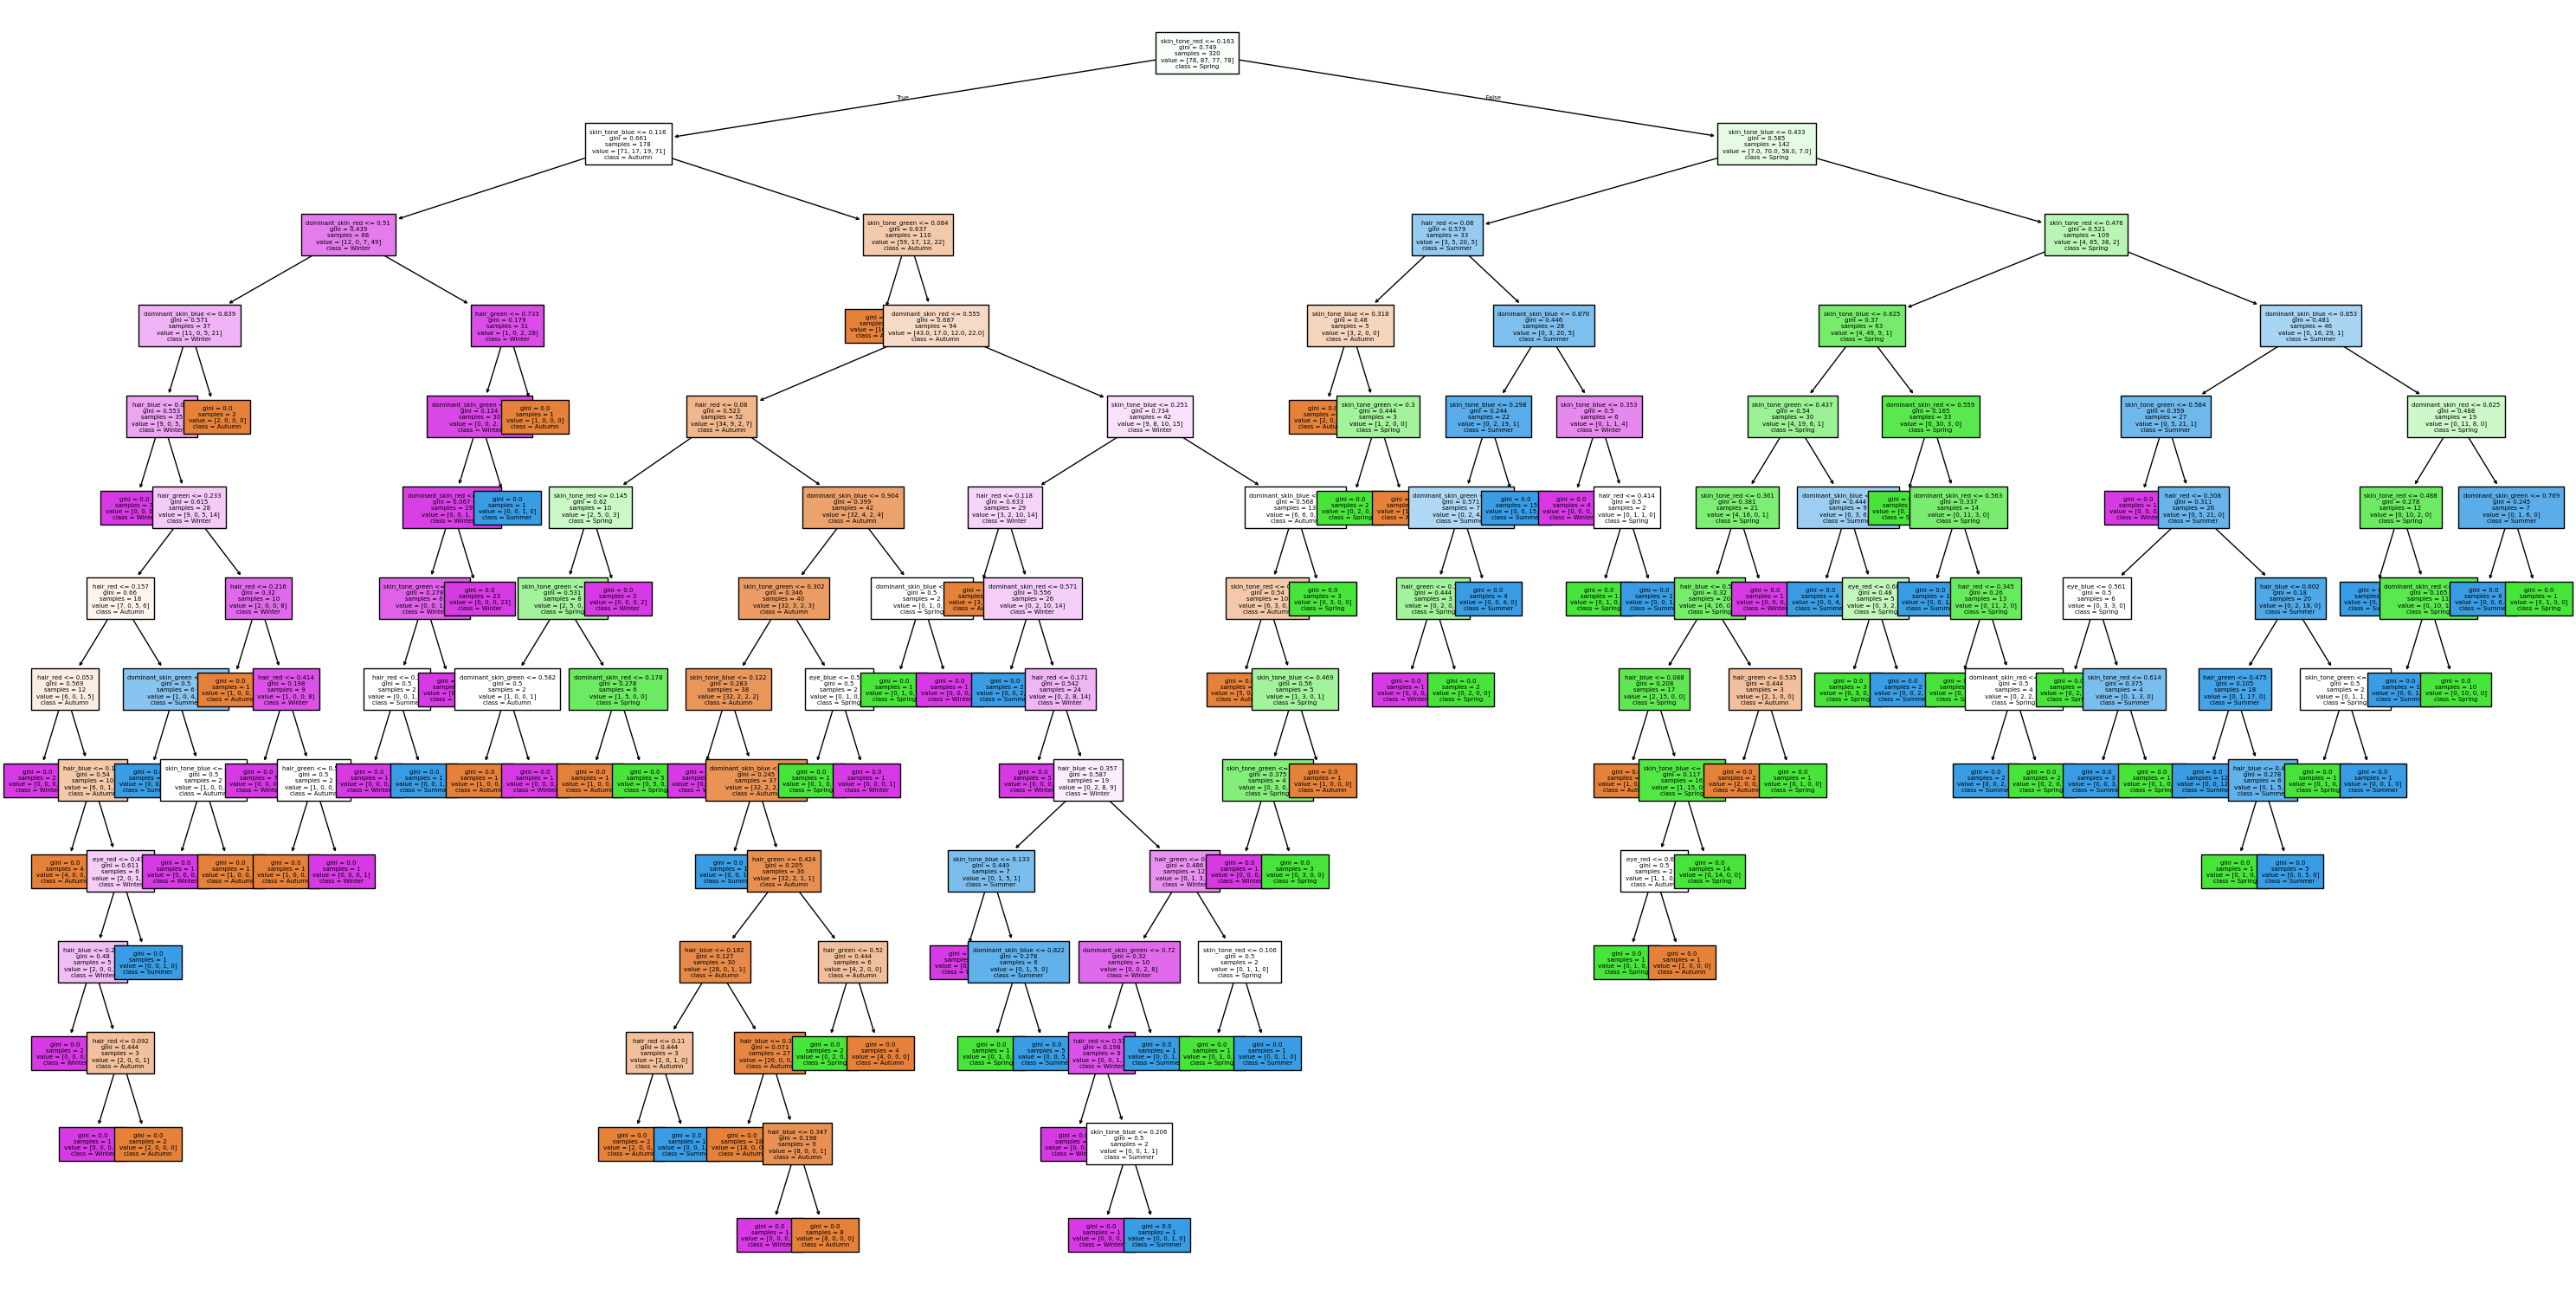

In [14]:
plt.figure("Decision Tree", figsize=[30,15])
plot_tree(model_tree,fontsize=5, filled = True,feature_names = sorted(features), class_names= sorted(target))
plt.tight_layout()
plt.show()

# K-nearest-neighbors Model
#### Grid search to find best K amount

In [15]:
# getting data and target
X = madummy_df.copy()
X = madummy_df.drop(['season_no','season'],axis = 1) # data
y = madummy_df['season'] # target


# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

parameters = {
    'n_neighbors' : range(1, 30+1)
}

grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           return_train_score = True)

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'n_neighbors': 9}

# K-nearest-neighbors Model
#### Using Train_Test_Split

In [19]:
# getting data and target
X = madummy_df.copy()
X = madummy_df.drop(['season_no','season'],axis = 1) # data
y = madummy_df['season'] # target


# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model_knn = KNeighborsClassifier(n_neighbors = 9)

model_knn.fit(X_train, y_train)

predictions = model_knn.predict(X_test)

score = accuracy_score(y_test, predictions)

score

0.5

# K-nearest-neighbors model

#### Using Cross-Validation to evaluate model better

In [17]:
# getting data and target
X = madummy_df.copy()
X = madummy_df.drop(['season_no','season'],axis = 1) # data
y = madummy_df['season'] # target

model_knn = KNeighborsClassifier(n_neighbors = 9)

cross_validation = cross_val_score(model_knn, X, y, cv = 5, scoring='accuracy')
print(cross_validation)
print("The model has an accuracy of: ",cross_validation.mean())

[0.475  0.5375 0.5625 0.5125 0.4875]
The model has an accuracy of:  0.5149999999999999


# K-nearest-neighbors Model
#### analysis report

In [20]:
y_pred = model_knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[11  2  2  7]
 [ 6 12  2  1]
 [ 2  4  8  3]
 [ 6  1  4  9]]
              precision    recall  f1-score   support

      Autumn       0.44      0.50      0.47        22
      Spring       0.63      0.57      0.60        21
      Summer       0.50      0.47      0.48        17
      Winter       0.45      0.45      0.45        20

    accuracy                           0.50        80
   macro avg       0.51      0.50      0.50        80
weighted avg       0.51      0.50      0.50        80



# Heat zone 

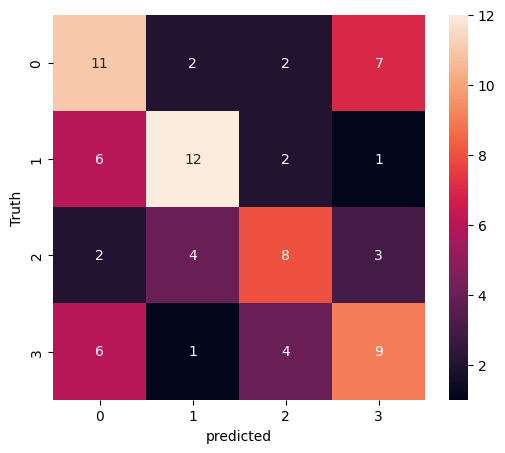

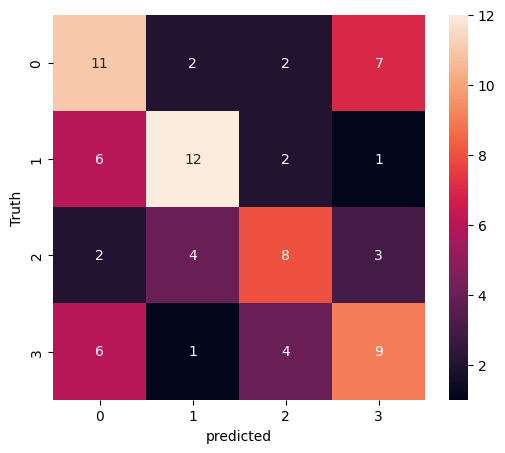

In [22]:
plt.figure(figsize=(6,5))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel('Truth')
plt.show()

# Random Forest Model
#### Train_Test_Split

In [26]:
# getting data and target
X = madummy_df.copy()
X = madummy_df.drop(['season_no','season'],axis = 1)# data
X = X.values
y = madummy_df['season'] # target


# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

model_forest = RandomForestClassifier()
model_forest.fit(X_train,y_train)
estimator = model_forest.fit(X_train,y_train)
predictions = model_forest.predict(X_test)

score = accuracy_score(y_test, predictions)

score

0.5625

# Random Forest Model
#### Using cross-validation to evaluate model better

In [25]:
# getting data and target
X = madummy_df.copy()
X = madummy_df.drop(['season_no','season'],axis = 1) # data
y = madummy_df['season'] # target

model_forest = RandomForestClassifier()

cross_validation = cross_val_score(model_forest, X, y, cv = 5, scoring='accuracy')
print(cross_validation)
print("The model has an accuracy of: ",cross_validation.mean())

[0.55   0.5375 0.5625 0.5375 0.525 ]
The model has an accuracy of:  0.5425


In [758]:
len(estimator.estimators_)

100

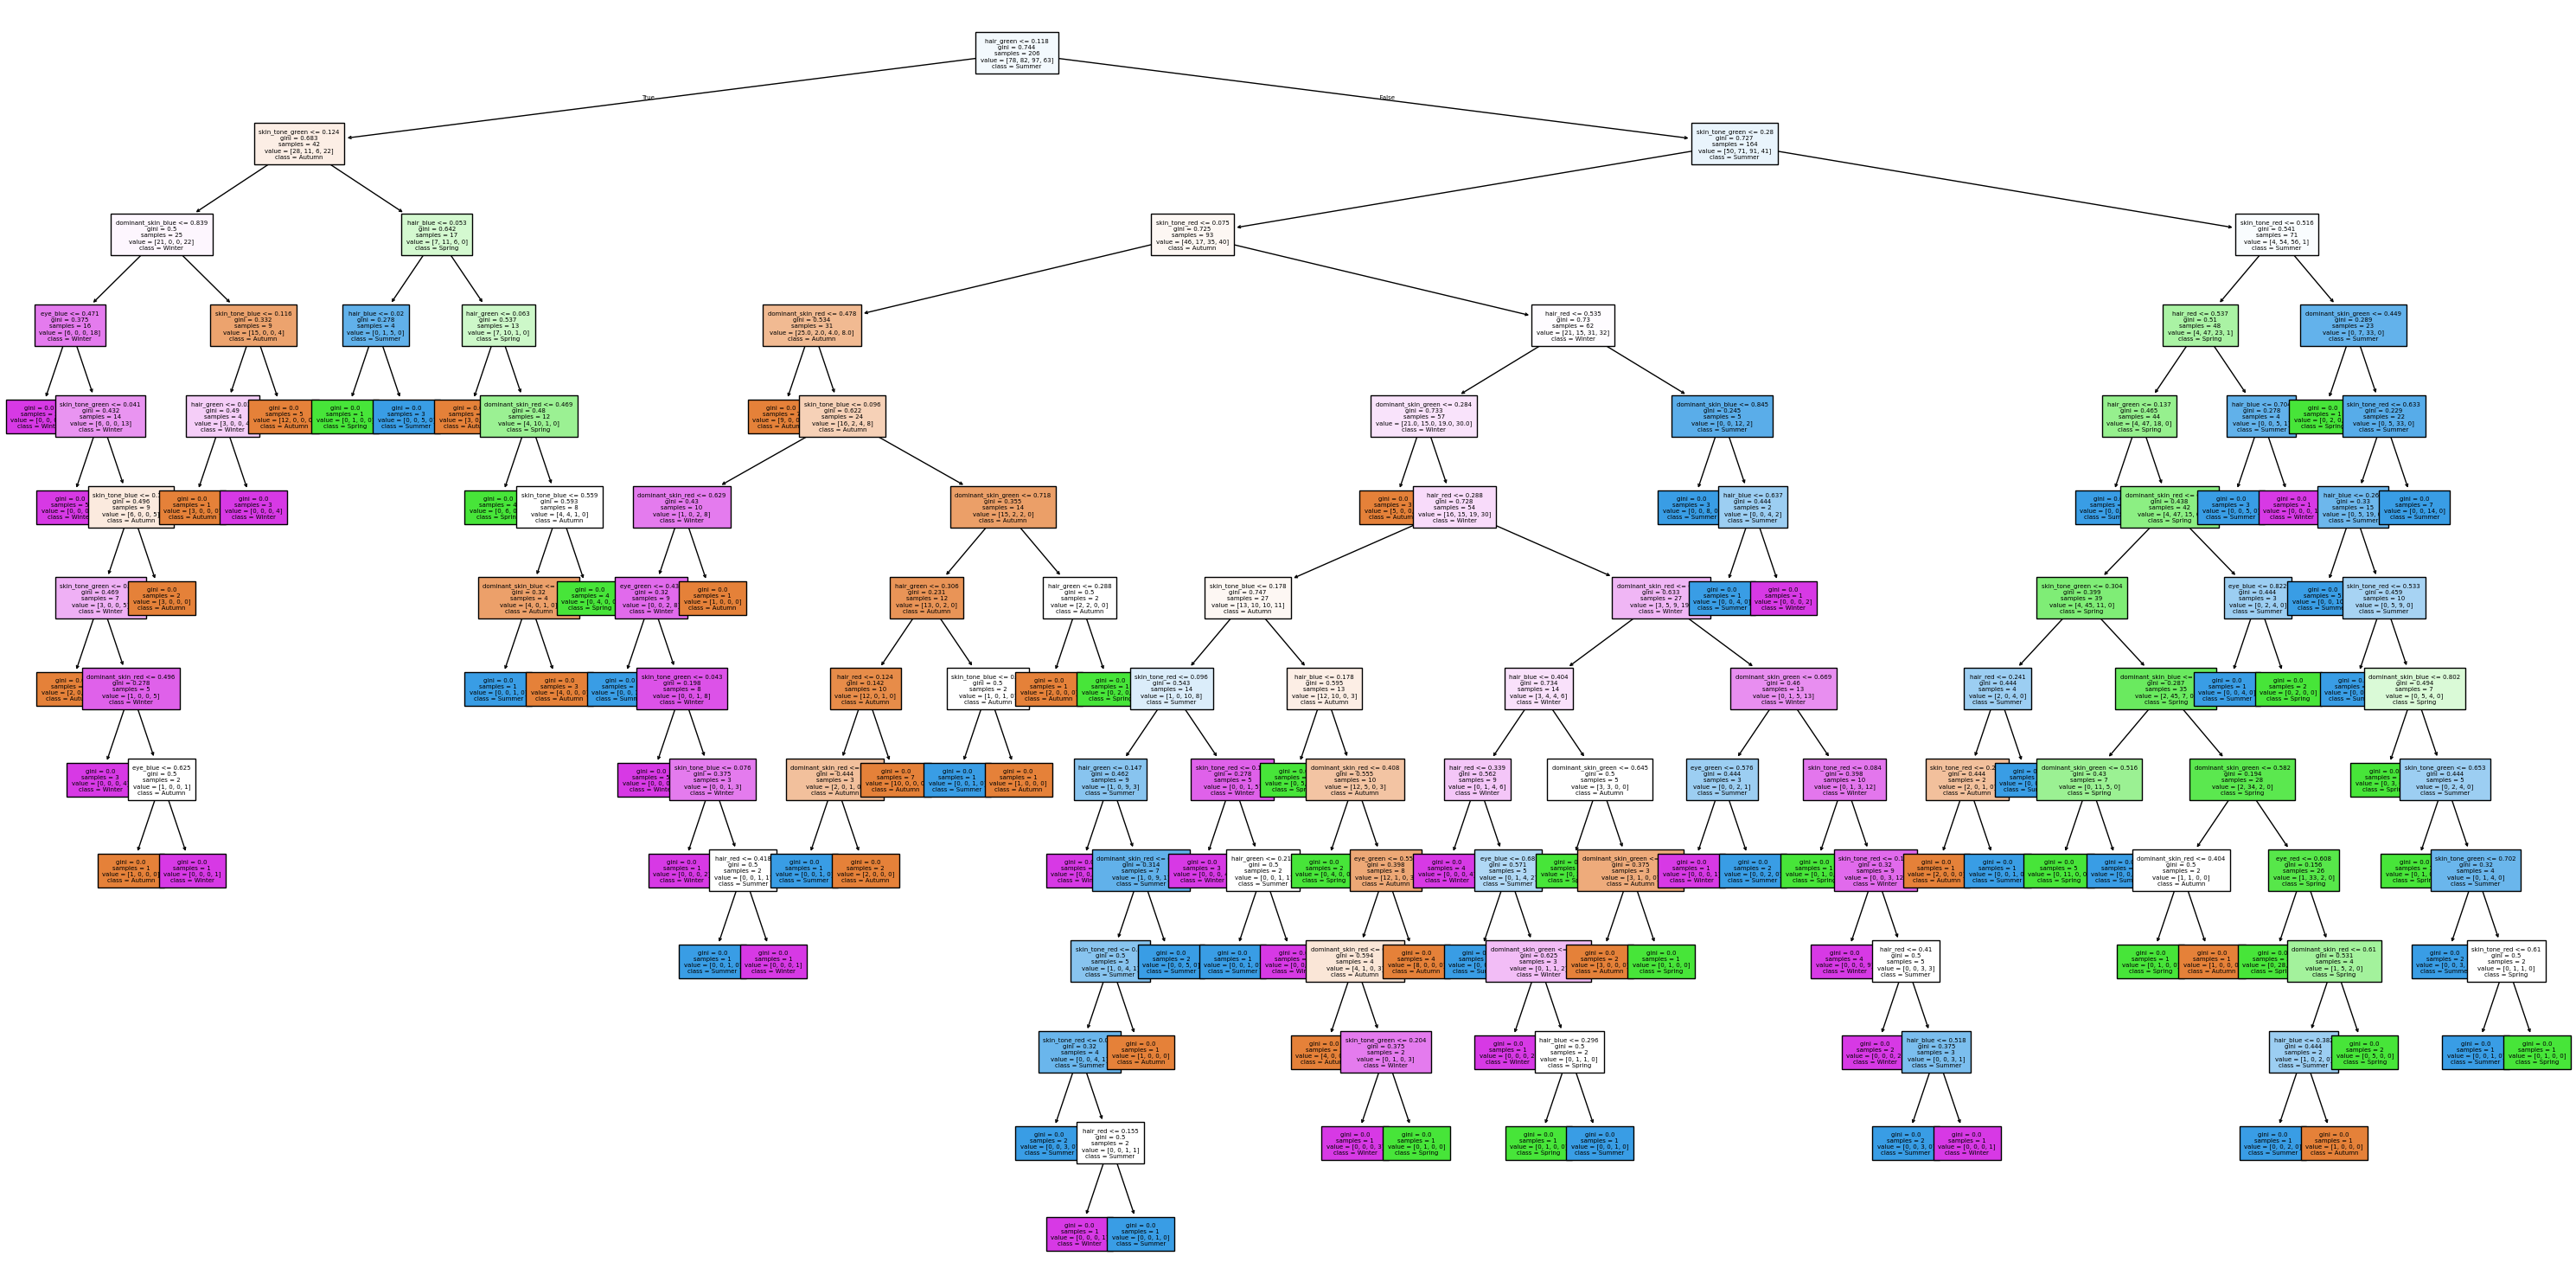

In [61]:
plt.figure("Decision Tree", figsize=[30,15])
plot_tree(estimator.estimators_[50],fontsize=5, filled = True,feature_names = sorted(features), class_names= sorted(target))
plt.tight_layout()
plt.show()

# Making a prediction on a new Person
#### using Random forest since it is the most accurate

In [72]:
#getting skin
data_skin =[]
image_pred = "aids.png"
result = stone.process(image_pred, "color", return_report_image=True) # this makes stone analyze the photo
dom_skin = result["faces"][0]['dominant_colors'][0]['color'] # getting the dominant skin color
skin_tone = result["faces"][0]['skin_tone'] # getting the average skin tone

data_skin.append(dom_skin)
data_skin.append(skin_tone)

print(data_skin)

for x in range(0,2):
    data_skin[x] = data_skin[x][1:]

data_skin_rgb = []
data_skin_rgb.append((hex_to_rgb(data_skin[0]))[0])
data_skin_rgb.append((hex_to_rgb(data_skin[0]))[1])
data_skin_rgb.append((hex_to_rgb(data_skin[0]))[2])

data_skin_rgb.append((hex_to_rgb(data_skin[1]))[0])
data_skin_rgb.append((hex_to_rgb(data_skin[1]))[1])
data_skin_rgb.append((hex_to_rgb(data_skin[1]))[2])


data_skin_rgb

['#CEA38C', '#9D7A54']


[206, 163, 140, 157, 122, 84]

In [73]:
#getting eye
data_eye = []
flag=0
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

img= cv2.imread(image_pred)
img_rgb= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)   #convert to RGB



(left_Start, left_End) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]            
#points for left eye and right eye
(right_Start, right_End) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]


gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# detect dlib face rectangles in the grayscale frame
dlib_faces = detector(gray, 0)


for face in dlib_faces:
    eyes = []                          # store 2 eyes

    # convert dlib rect to a bounding box
    (x,y,w,h) = face_utils.rect_to_bb(face)
    cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(255,0,0),1)       #draws blue box over face 
 
    
    
    shape = predictor(gray, face)
    shape = face_utils.shape_to_np(shape)
    
    leftEye = shape[left_Start:left_End]               
    # indexes for left eye key points

    rightEye = shape[right_Start:right_End]
    
    eyes.append(leftEye)  # wrap in a list
    eyes.append(rightEye)
    
    for index, eye in enumerate(eyes):
        flag+=1
        left_side_eye = eye[0]  # left edge of eye
        right_side_eye = eye[3]  # right edge of eye
        top_side_eye = eye[1]  # top side of eye
        bottom_side_eye = eye[4]  # bottom side of eye

        # calculate height and width of dlib eye keypoints
        eye_width = right_side_eye[0] - left_side_eye[0]
        eye_height = bottom_side_eye[1] - top_side_eye[1]

        # create bounding box with buffer around keypoints
        eye_x1 = int(left_side_eye[0] - 0 * eye_width)  
        eye_x2 = int(right_side_eye[0] + 0 * eye_width)  

        eye_y1 = int(top_side_eye[1] - 1 * eye_height)
        eye_y2 = int(bottom_side_eye[1] + 0.75 * eye_height)

        # draw bounding box around eye roi
        
        #cv2.rectangle(img_rgb,(eye_x1, eye_y1), (eye_x2, eye_y2),(0,255,0),2) 
        
        
        roi_eye = img_rgb[eye_y1:eye_y2 ,eye_x1:eye_x2]     #  desired EYE Region(RGB)
        if flag==1:
            break
        
x=roi_eye.shape                                                        
row=x[0] 
col=x[1]
# this is the main part,                             
# where you pick RGB values from the area just below pupil
array1=roi_eye[row//2:(row//2)+1,int((col//3)+3):int((col//3))+6]
array1=array1[0][2]
array1=list(array1)

data_eye.append(array1[0])
data_eye.append(array1[1])
data_eye.append(array1[2])

print(data_eye)



[25, 25, 23]


In [74]:
data_hair = []

hcd = HairColorDetector()
color = hcd.get_color(image_pred,  save_result=True, n_clusters=10)

data_hair.append(color[-1][0])
data_hair.append(color[-1][1])
data_hair.append(color[-1][1])

data_hair

[31, 30, 30]

In [75]:
final_list = []

for x in data_skin_rgb:
    final_list.append(x)

for y in data_eye:
    final_list.append(y)

for z in data_hair:
    final_list.append(z)

for zz in range(len(final_list)):
    final_list[zz] = final_list[zz]/255

final_list

[0.807843137254902,
 0.6392156862745098,
 0.5490196078431373,
 0.615686274509804,
 0.47843137254901963,
 0.32941176470588235,
 0.09803921568627451,
 0.09803921568627451,
 0.09019607843137255,
 0.12156862745098039,
 0.11764705882352941,
 0.11764705882352941]

In [76]:
predictions = model_forest.predict([final_list])

predictions

array(['Autumn'], dtype=object)

Since you belong to Autumn, these colors would look nice on you!


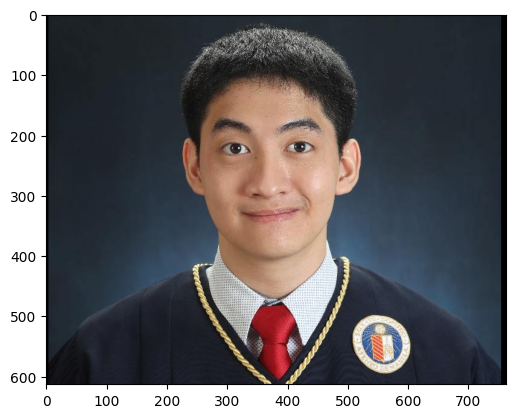

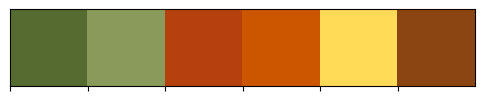

In [77]:
print('Since you belong to', predictions[0] + ', these colors would look nice on you!')
plt.imshow(mpimg.imread(image_pred))

if predictions == "Autumn":
    color_palette = ['#556B2F','#8A9A5B', '#B7410E','#CC5500','#FFDB58','#8B4513']
    sn.palplot(sn.color_palette(color_palette))
elif predictions == "Spring":
    color_palette = ['#FF7F50','#FFDAB9','#FFD700','#40E0D0','#9ACD32','#00FFFF']
    sn.palplot(sn.color_palette(color_palette))
elif predictions == "Summer":
    color_palette = ['#E6E6FA','#AEC6CF','#FFC0CB','#F4C2C2','#B0C4DE','#B3DAF1']
    sn.palplot(sn.color_palette(color_palette))
elif predictions == "Winter":
    color_palette = ['#000000','#FFFFFF','#000080','#50C878','#4169E1','#800020']
    sn.palplot(sn.color_palette(color_palette))

plt.show()